In [114]:
# read the data and set the datetime as the index
import pandas as pd
#df = pd.read_csv(r"C:\Users\nfrq38\DS\Prj\data_set_inquiries_CN.csv",dayfirst=True, parse_dates=[0])
df = pd.read_csv("https://raw.githubusercontent.com/gusharani/project_DS/master/data_set_inquiries_CN.csv",dayfirst=True, parse_dates=[0])

#df = pd.read_csv("https://raw.githubusercontent.com/gusharani/project_DS/master/data_set_inquiries_CN_YYYY.csv", parse_dates=[0])
df.head()

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df['Year'] = df.index.year
df['Month'] = df.index.month



In [115]:

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

# create a custom colormap
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [116]:
### by monthly spent
by_monthly_spent = df[['Email_Promo_spent','Road_Show_spent','Event_spent','Display_Ads_spent','Est_Rev']].resample('M', 'sum')
by_monthly_spent.head()


C:\ProgramData\Anaconda3\envs\Python27\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  from ipykernel import kernelapp as app


,Email_Promo_spent,Road_Show_spent,Event_spent,Display_Ads_spent,Est_Rev
Date,,,,,
2014-11-30,9000,48000,135000,30000,507460.420
2014-12-31,18300,60000,180000,0,584384.128
2015-01-31,49800,72000,270000,30000,968328.368
2015-02-28,0,24000,120000,45000,432078.572
2015-03-31,19500,84000,240000,45000,862268.260


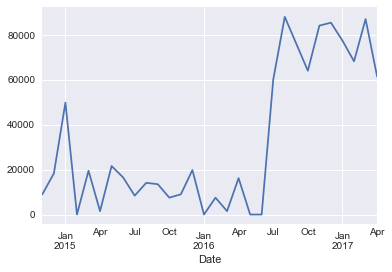

In [117]:
by_monthly_spent['Email_Promo_spent'].plot()


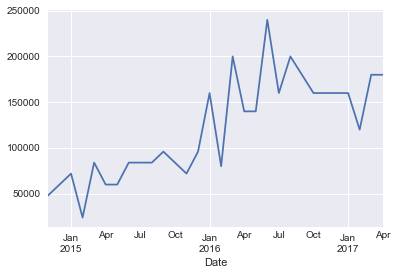

In [118]:
by_monthly_spent['Road_Show_spent'].plot()


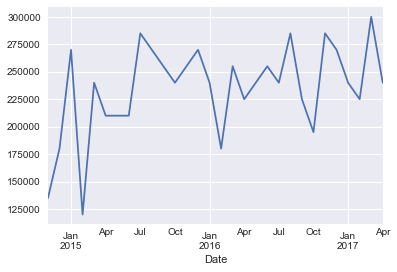

In [119]:
by_monthly_spent['Event_spent'].plot()


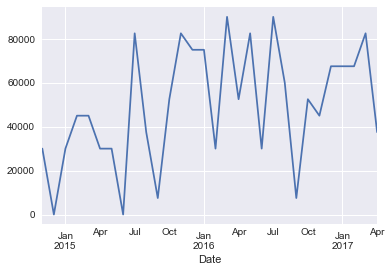

In [120]:
by_monthly_spent['Display_Ads_spent'].plot()



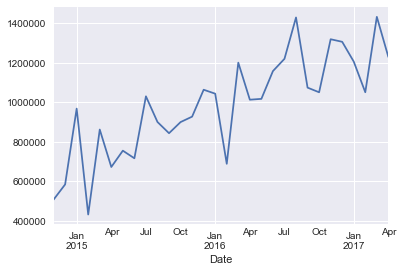

In [121]:
by_monthly_spent['Est_Rev'].plot()

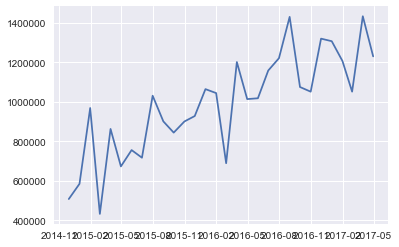

In [122]:
plt.plot(by_monthly_spent['Est_Rev'])

C:\ProgramData\Anaconda3\envs\Python27\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=3,center=False).mean()
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\envs\Python27\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=3,center=False).mean()
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\envs\Python27\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=3,center=False).mean()
  app.launch_new_instance()
C:\ProgramData\Anaconda3\envs\Python27\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a f

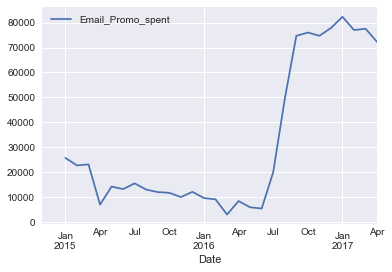

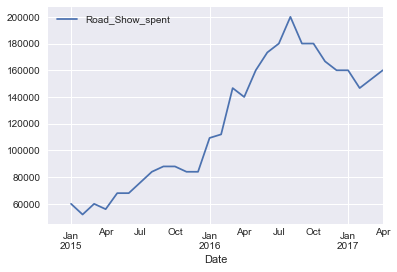

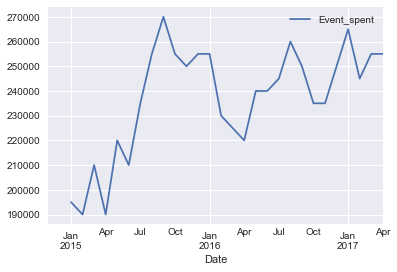

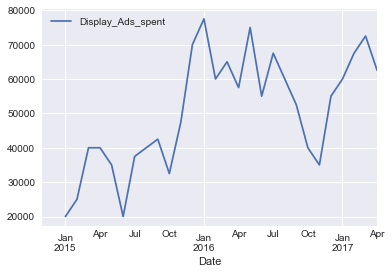

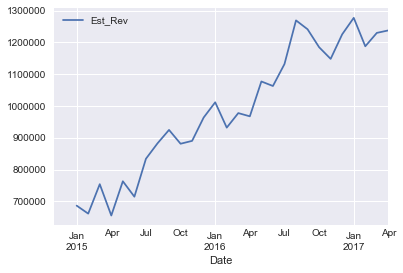

In [123]:
pd.rolling_mean(by_monthly_spent[['Email_Promo_spent']], 3).plot()
pd.rolling_mean(by_monthly_spent[['Road_Show_spent']], 3).plot()
pd.rolling_mean(by_monthly_spent[['Event_spent']], 3).plot()
pd.rolling_mean(by_monthly_spent[['Display_Ads_spent']], 3).plot()

pd.rolling_mean(by_monthly_spent[['Est_Rev']], 3).plot()

In [124]:
print('Autocorrelation 1: ', by_monthly_spent['Est_Rev'].autocorr(1))
print('Autocorrelation 3: ', by_monthly_spent['Est_Rev'].autocorr(3))
print('Autocorrelation 12: ',by_monthly_spent['Est_Rev'].autocorr(12))

('Autocorrelation 1: ', 0.52504920783957043)
('Autocorrelation 3: ', 0.66693695864781166)
('Autocorrelation 12: ', 0.80642949566603506)


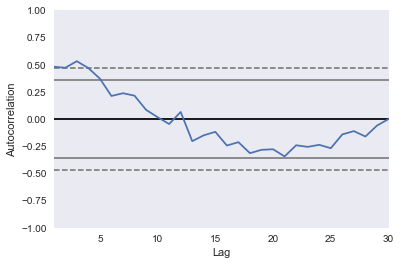

In [125]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(by_monthly_spent['Est_Rev'])

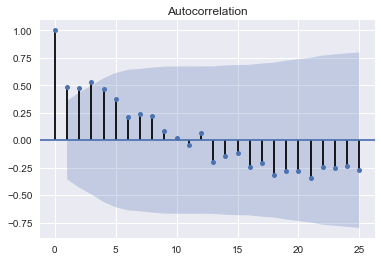

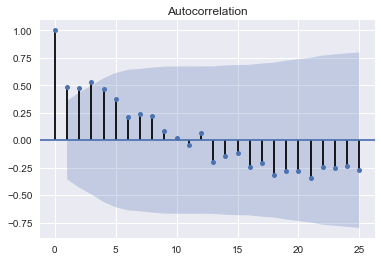

In [126]:

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(by_monthly_spent['Est_Rev'], lags=25)

In [127]:

n = len(by_monthly_spent.Est_Rev)

train = by_monthly_spent.Est_Rev[:int(.75*n)]
test = by_monthly_spent.Est_Rev[int(.75*n):]


In [128]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error


#The parameters of the ARIMA model are defined as follows:

#p: The number of lag observations included in the model, also called the lag order.
#d: The number of times that the raw observations are differenced, also called the degree of differencing.
#q: The size of the moving average window, also called the order of moving average.
    
    
    

In [129]:
model = sm.tsa.ARIMA(train, (1, 0, 0)).fit()

predictions = model.predict(
    '2016-09-30',
    '2017-04-30',
    dynamic=True,
)

print("Mean absolute error: ", mean_absolute_error(test, predictions))
model.summary()


('Mean absolute error: ', 266496.67492636212)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Est_Rev   No. Observations:                   22
Model:                     ARMA(1, 0)   Log Likelihood                -302.074
Method:                       css-mle   S.D. of innovations         221174.799
Date:                Sat, 03 Jun 2017   AIC                            610.148
Time:                        07:33:00   BIC                            613.421
Sample:                    11-30-2014   HQIC                           610.919
                         - 08-31-2016                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.063e+05   8.19e+04     11.061      0.000    7.46e+05    1.07e+06
ar.L1.Est_Rev     0.4442      0.230      1.927      0.068      -0.008       0.896
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2511           +0.0000j            2.2511            0.0000
-----------------------------------------------------------------------------
"""

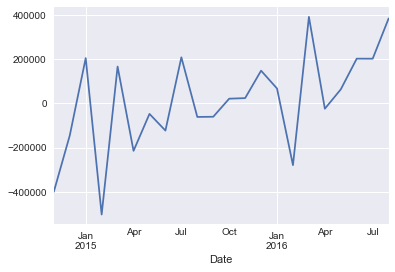

In [130]:
#Plot the residuals - where are their significant errors.
model.resid.plot()


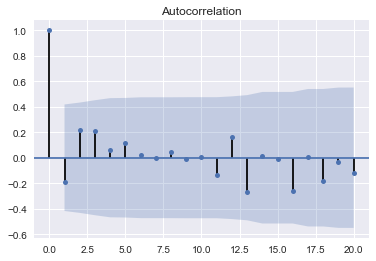

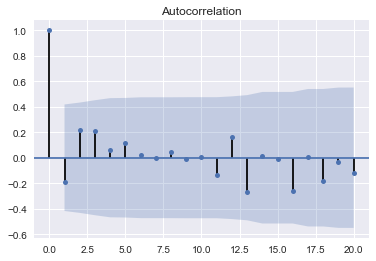

In [131]:

plot_acf(model.resid, lags=20)

In [132]:

#Compute and AR(2) model and an ARMA(2, 2) model - does this improve your mean absolute error on the held out set.
model = sm.tsa.ARIMA(train, (2, 0, 0)).fit()

predictions = model.predict(
    '2016-09-30',
    '2017-04-30',
    dynamic=True,
)

print("Mean absolute error: ", mean_absolute_error(test, predictions))
model.summary()

('Mean absolute error: ', 128555.94451039541)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Est_Rev   No. Observations:                   22
Model:                     ARMA(2, 0)   Log Likelihood                -299.737
Method:                       css-mle   S.D. of innovations         192272.577
Date:                Sat, 03 Jun 2017   AIC                            607.475
Time:                        07:33:01   BIC                            611.839
Sample:                    11-30-2014   HQIC                           608.503
                         - 08-31-2016                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.104e+06        nan        nan        nan         nan         nan
ar.L1.Est_Rev     0.3414        nan        nan        nan         nan         nan
ar.L2.Est_Rev     0.5633        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0634           +0.0000j            1.0634            0.0000
AR.2           -1.6695           +0.0000j            1.6695            0.5000
-----------------------------------------------------------------------------
"""

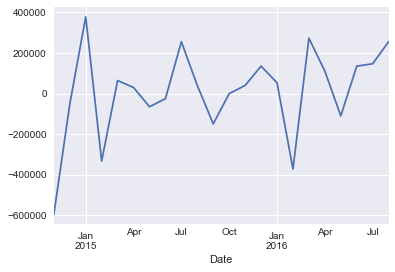

In [133]:
#Plot the residuals - where are their significant errors.
model.resid.plot()

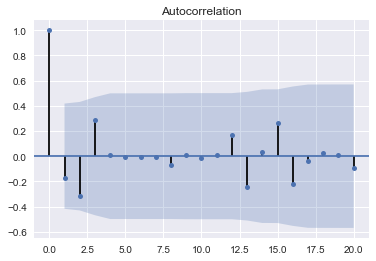

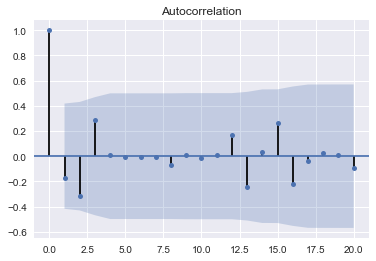

In [134]:
plot_acf(model.resid, lags=20)

In [135]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy

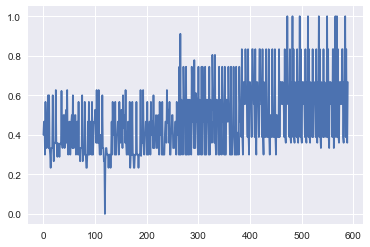

In [136]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
#dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataframe = pd.read_csv("https://raw.githubusercontent.com/gusharani/project_DS/master/data_set_inquiries_CN_LSTM.csv",usecols=[1], engine='python',)
plt.plot(dataset)
plt.show()



Epoch 1/100
0s - loss: 0.1896
Epoch 2/100
0s - loss: 0.1878
Epoch 3/100
0s - loss: 0.1861
Epoch 4/100
0s - loss: 0.1843
Epoch 5/100
0s - loss: 0.1826
Epoch 6/100
0s - loss: 0.1808
Epoch 7/100
0s - loss: 0.1791
Epoch 8/100
0s - loss: 0.1773
Epoch 9/100
0s - loss: 0.1756
Epoch 10/100
0s - loss: 0.1739
Epoch 11/100
0s - loss: 0.1722
Epoch 12/100
0s - loss: 0.1704
Epoch 13/100
0s - loss: 0.1687
Epoch 14/100
0s - loss: 0.1670
Epoch 15/100
0s - loss: 0.1653
Epoch 16/100
0s - loss: 0.1636
Epoch 17/100
0s - loss: 0.1619
Epoch 18/100
0s - loss: 0.1603
Epoch 19/100
0s - loss: 0.1586
Epoch 20/100
0s - loss: 0.1569
Epoch 21/100
0s - loss: 0.1552
Epoch 22/100
0s - loss: 0.1536
Epoch 23/100
0s - loss: 0.1519
Epoch 24/100
0s - loss: 0.1503
Epoch 25/100
0s - loss: 0.1486
Epoch 26/100
0s - loss: 0.1470
Epoch 27/100
0s - loss: 0.1454
Epoch 28/100
0s - loss: 0.1437
Epoch 29/100
0s - loss: 0.1421
Epoch 30/100
0s - loss: 0.1405
Epoch 31/100
0s - loss: 0.1389
Epoch 32/100
0s - loss: 0.1373
Epoch 33/100
0s -

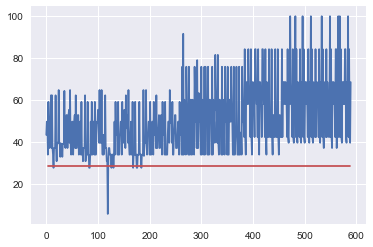

In [137]:
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/100
0s - loss: 0.0509
Epoch 2/100
0s - loss: 0.0494
Epoch 3/100
0s - loss: 0.0480
Epoch 4/100
0s - loss: 0.0465
Epoch 5/100
0s - loss: 0.0450
Epoch 6/100
0s - loss: 0.0436
Epoch 7/100
0s - loss: 0.0422
Epoch 8/100
0s - loss: 0.0408
Epoch 9/100
0s - loss: 0.0394
Epoch 10/100
0s - loss: 0.0381
Epoch 11/100
0s - loss: 0.0367
Epoch 12/100
0s - loss: 0.0354
Epoch 13/100
0s - loss: 0.0341
Epoch 14/100
0s - loss: 0.0328
Epoch 15/100
0s - loss: 0.0316
Epoch 16/100
0s - loss: 0.0303
Epoch 17/100
0s - loss: 0.0291
Epoch 18/100
0s - loss: 0.0279
Epoch 19/100
0s - loss: 0.0268
Epoch 20/100
0s - loss: 0.0256
Epoch 21/100
0s - loss: 0.0245
Epoch 22/100
0s - loss: 0.0234
Epoch 23/100
0s - loss: 0.0224
Epoch 24/100
0s - loss: 0.0213
Epoch 25/100
0s - loss: 0.0203
Epoch 26/100
0s - loss: 0.0193
Epoch 27/100
0s - loss: 0.0183
Epoch 28/100
0s - loss: 0.0174
Epoch 29/100
0s - loss: 0.0165
Epoch 30/100
0s - loss: 0.0156
Epoch 31/100
0s - loss: 0.0147
Epoch 32/100
0s - loss: 0.0139
Epoch 33/100
0s -

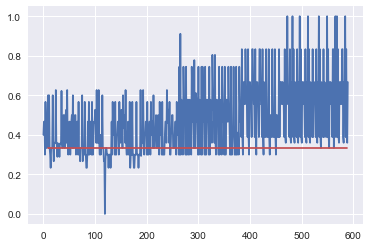

In [138]:
#LSTM for Regression Using the Window Method
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
#dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
#dataset = dataframe.values
#dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/100
0s - loss: 0.0509
Epoch 2/100
0s - loss: 0.0494
Epoch 3/100
0s - loss: 0.0480
Epoch 4/100
0s - loss: 0.0465
Epoch 5/100
0s - loss: 0.0450
Epoch 6/100
0s - loss: 0.0436
Epoch 7/100
0s - loss: 0.0422
Epoch 8/100
0s - loss: 0.0408
Epoch 9/100
0s - loss: 0.0394
Epoch 10/100
0s - loss: 0.0381
Epoch 11/100
0s - loss: 0.0367
Epoch 12/100
0s - loss: 0.0354
Epoch 13/100
0s - loss: 0.0341
Epoch 14/100
0s - loss: 0.0328
Epoch 15/100
0s - loss: 0.0316
Epoch 16/100
0s - loss: 0.0303
Epoch 17/100
0s - loss: 0.0291
Epoch 18/100
0s - loss: 0.0279
Epoch 19/100
0s - loss: 0.0268
Epoch 20/100
0s - loss: 0.0256
Epoch 21/100
0s - loss: 0.0245
Epoch 22/100
0s - loss: 0.0234
Epoch 23/100
0s - loss: 0.0224
Epoch 24/100
0s - loss: 0.0213
Epoch 25/100
0s - loss: 0.0203
Epoch 26/100
0s - loss: 0.0193
Epoch 27/100
0s - loss: 0.0183
Epoch 28/100
0s - loss: 0.0174
Epoch 29/100
0s - loss: 0.0165
Epoch 30/100
0s - loss: 0.0156
Epoch 31/100
0s - loss: 0.0147
Epoch 32/100
0s - loss: 0.0139
Epoch 33/100
0s -

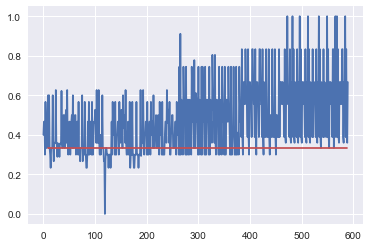

In [139]:
#LSTM for Regression with Time Steps
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
#dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
#dataset = dataframe.values
#dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/1
0s - loss: 0.0509
Epoch 1/1
0s - loss: 0.0494
Epoch 1/1
0s - loss: 0.0480
Epoch 1/1
0s - loss: 0.0465
Epoch 1/1
0s - loss: 0.0450
Epoch 1/1
0s - loss: 0.0436
Epoch 1/1
0s - loss: 0.0422
Epoch 1/1
0s - loss: 0.0408
Epoch 1/1
0s - loss: 0.0394
Epoch 1/1
0s - loss: 0.0381
Epoch 1/1
0s - loss: 0.0367
Epoch 1/1
0s - loss: 0.0354
Epoch 1/1
0s - loss: 0.0341
Epoch 1/1
0s - loss: 0.0328
Epoch 1/1
0s - loss: 0.0316
Epoch 1/1
0s - loss: 0.0303
Epoch 1/1
0s - loss: 0.0291
Epoch 1/1
0s - loss: 0.0279
Epoch 1/1
0s - loss: 0.0268
Epoch 1/1
0s - loss: 0.0256
Epoch 1/1
0s - loss: 0.0245
Epoch 1/1
0s - loss: 0.0234
Epoch 1/1
0s - loss: 0.0224
Epoch 1/1
0s - loss: 0.0213
Epoch 1/1
0s - loss: 0.0203
Epoch 1/1
0s - loss: 0.0193
Epoch 1/1
0s - loss: 0.0183
Epoch 1/1
0s - loss: 0.0174
Epoch 1/1
0s - loss: 0.0165
Epoch 1/1
0s - loss: 0.0156
Epoch 1/1
0s - loss: 0.0147
Epoch 1/1
0s - loss: 0.0139
Epoch 1/1
0s - loss: 0.0131
Epoch 1/1
0s - loss: 0.0123
Epoch 1/1
0s - loss: 0.0116
Epoch 1/1
0s - loss:

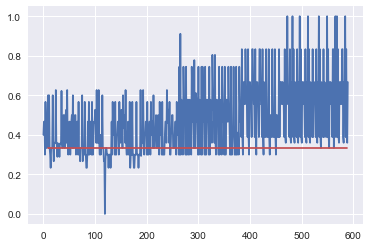

In [140]:
#LSTM with Memory Between Batches
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/1
0s - loss: 0.0779
Epoch 1/1
0s - loss: 0.0759
Epoch 1/1
0s - loss: 0.0738
Epoch 1/1
0s - loss: 0.0718
Epoch 1/1
0s - loss: 0.0697
Epoch 1/1
0s - loss: 0.0677
Epoch 1/1
0s - loss: 0.0657
Epoch 1/1
0s - loss: 0.0638
Epoch 1/1
0s - loss: 0.0618
Epoch 1/1
0s - loss: 0.0599
Epoch 1/1
0s - loss: 0.0580
Epoch 1/1
0s - loss: 0.0561
Epoch 1/1
0s - loss: 0.0542
Epoch 1/1
0s - loss: 0.0523
Epoch 1/1
0s - loss: 0.0505
Epoch 1/1
0s - loss: 0.0487
Epoch 1/1
0s - loss: 0.0469
Epoch 1/1
0s - loss: 0.0452
Epoch 1/1
0s - loss: 0.0434
Epoch 1/1
0s - loss: 0.0417
Epoch 1/1
0s - loss: 0.0401
Epoch 1/1
0s - loss: 0.0384
Epoch 1/1
0s - loss: 0.0368
Epoch 1/1
0s - loss: 0.0352
Epoch 1/1
0s - loss: 0.0336
Epoch 1/1
0s - loss: 0.0321
Epoch 1/1
0s - loss: 0.0306
Epoch 1/1
0s - loss: 0.0291
Epoch 1/1
0s - loss: 0.0276
Epoch 1/1
0s - loss: 0.0262
Epoch 1/1
0s - loss: 0.0248
Epoch 1/1
0s - loss: 0.0235
Epoch 1/1
0s - loss: 0.0222
Epoch 1/1
0s - loss: 0.0209
Epoch 1/1
0s - loss: 0.0196
Epoch 1/1
0s - loss:

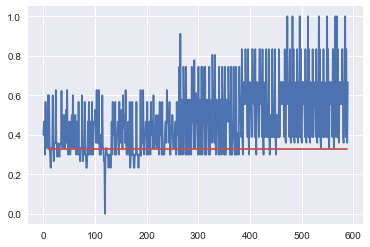

In [141]:
#Stacked LSTMs with Memory Between Batches
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()